# Effect of vacuum on tunneling 

Controlling coherent transport by quantum vacuum 

Tunneling, a prominent mechanism of coherent transport, underpins a plethora of phenomena ranging from proton transfer in biochemistry to functioning of a tunneling diode. Tunneling dynamics is typically modeled using a 1D semiclassical approximation. It has been pointed out that tunneling can have drastically different properties if the interaction with other degrees of freedom during under the barrier motion is accounted for. (In particular, we have shown that it is common to see that tunneling is more probable than flying above the barrier; this cannot be achieved in 1D.) According to our recent preliminary simulations, tunneling probability can be controlled by coupling a tunneling quantum particle to the vacuum. We see the evidence for both enhancement and suppression of tunneling. A connection of the simulated evolution with the Purcell effect should be investigated. An example of the experimental realization can be a tunneling junction embedded into a microcavity of a tailored shape. Using this architecture, we could try to assess a possibility for the vacuum assisted Feynman-Smoluchowski ratchet.


In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import funm

Quantum particle

In [2]:
N = 30

a = destroy(N)

# momentum operator
p = 1j * np.sqrt(0.5 * 1.) * (a.dag() - a)

# coordinate operator
x = np.sqrt(0.5 / 1.) * (a.dag() + a)

# optical mode function of a cavity -- standing wave 
omega = 0.1

# note the center position of cavity_mode (x -> x - offset) also affects the dynamics
cavity_mode = (1j * omega * x).expm()
cavity_mode = 0.5 * (cavity_mode + cavity_mode.dag())

# the projector to the right hand side of x
proj_right_x = Qobj(funm(x.data.toarray(), lambda x: (x > 0)))

In [3]:
p = tensor(p, qeye(N))
x = tensor(x, qeye(N))
cavity_mode = tensor(cavity_mode, qeye(N))
proj_right_x = tensor(proj_right_x, qeye(N))

photon fields

In [4]:
a = destroy(N)
a = tensor(qeye(N), a)



# coupling constant
kappa = 0.

In [5]:
time = np.linspace(0, 60, 500)

Hamiltonian for the system 

In [6]:
def evolve(kappa):

    # create the hamiltonian of the system
    U = 0.007 * x ** 4 - x ** 2
    H = 0.5 * p ** 2 + U + omega * a.dag() * a + kappa * (a + a.dag()) * cavity_mode
    
    return mesolve(H, tensor(coherent(N, -1), fock(N, 0)), time, [], [proj_right_x])

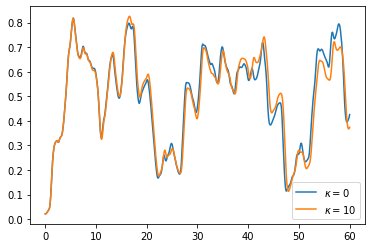

In [7]:
plt.plot(time, evolve(0.).expect[0], label='$\kappa = 0$')
plt.plot(time, evolve(0.5).expect[0], label='$\kappa = 10.$')
plt.legend()
plt.show()